In [1]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np

from   mpl_toolkits.axes_grid1 import make_axes_locatable
from   astropy.table           import Table, vstack

In [2]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [3]:
from   gama_limits import gama_field
from   delta8_limits import delta8_tier

In [4]:
field = 'G9'

In [5]:
gama_d8 = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_ddp_n8.fits')
gama_d8

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN,DDP [3],RANDSEP,RANDMATCH,BOUND_DIST,FILLFACTOR,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP2_DELTA8,DDP3_DELTA8
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,,,,,,,,,,,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64,float64,int64,float64,float64,int64,int64,int64,float64,float64,float64
362425,587726033337581772,214.95393046,2.67154741,18.742716,0.21257,4,G15_Y4_204_236,6,21.026892,19.474321,18.431656,18.070723,17.813332,740.3320093601347,39.34713263579353,G15,-499.86908320424453,-349.4134486013644,28.45788369012037,1.0426655,0.7771443866829567,0,5,0.010533728329887346,0.2760548232143135,0.23917836835920325,0.6057452555692538,0.6760985943573322,0.8,-0.2061929,-0.170056,-20.637402272811368,-20.673539168229535,39.38011810838266,39.41625500380083,1.0572834,0.320225678707575,0.0,-6.742716,0.011286766979815658,0.0,1 .. 0,0.8900989252700208,1367013,3.01351515495465,0.789868574993176,2,0,0,-0.7806944920613336,-1.0,-1.0
593328,588848899928490362,216.19018958,-0.06390901,19.43172,0.2235,4,G15_Y5_029_257,5,21.046928,20.12258,19.435946,19.117981,18.897947,783.5753008029073,39.47040369037777,G15,-516.8720878971467,-378.1572918367678,-0.7143583528692741,0.68663406,0.4566183967449612,0,3,-0.08817245575120615,0.14184321122453575,0.10372704404483975,0.35644770371633794,0.4339134040492049,2.12,-0.216795,-0.47381997,-19.925615003326342,-19.668590029695437,39.35733573696892,39.100310763338015,0.3682785,0.269045029679485,0.0,-7.4317207,0.007166017826746386,0.0,0 .. 0,0.5962791836322069,462094,21.801716514251623,0.9623900465088047,32,0,0,1.8798723290550465,-1.0,-1.0
618106,588848900464574673,214.31336596,0.22075465,16.170456,0.07737,5,341285962455738368,6,18.195229,16.813845,16.158504,15.782061,15.537715,246.19238260163945,36.95637305684218,G15,-188.7422327150531,-128.81575031720232,0.8804320983496571,0.6553402,0.6875878957486503,0,4,-0.1255473060374953,-0.15779500708352887,0.09699004031185227,0.138711905019732,0.6136183299942687,2.12,-0.07504891,-0.1640244,-20.807858255945575,-20.71888276680602,36.97831418856276,36.889338699423206,3.6295433,0.40327443796798446,0.0,-4.170456,0.011598351986485969,0.0,1 .. 0,0.8106683294126944,313137,8.376192804110547,1.052847250492675,25,30,54,1.0565961605851468,0.3382399116432493,0.29999605021840936
402438,587728308031455531,175.10906032,1.92540842,19.630432,0.10637,4,G12_Y1_AX2_342,5,21.03995,19.982323,19.521618,19.327724,19.009548,345.57083580708604,37.69268541697266,G12,-311.0335194952412,26.615433527223907,10.494341549118754,0.4607048,0.4528816759408177,0,3,-0.10130106725601305,-0.09347793973003385,0.0899647087216288,0.11983561902515796,0.4308338931632677,2.12,-0.1031789,-0.2255044,-18.049039093327533,-17.92671359844209,37.679471222233786,37.55714572734834,0.16956711,0.11515473863099127,0.0,-7.630432,0.003219373901877069,0.0,0 .. 0,0.6962022749038669,913029,1.538566725401942,0.5007785416426629,12,13,0,1.0754387175871565,0.21920218393469715,-1.0
492038,587729778517999859,214.41790442,-1.40672457,19.247726,0.15189,4,G15_Y2_018_136,6,22.165962,20.252304,19.225452,18.81359,18.492945,508.9929710660956,38.53355892496193,G15,-364.41025385564774,-249.68420752886212,-10.847847462004411,1.0268517,0.8925864347552422,0,6,-0.038625779433040755,0.0956394398644513

In [26]:
gama_d8['ZGAMA'].min(), gama_d8['ZGAMA'].max()

(0.03905, 0.26299)

In [6]:
np.unique(gama_d8['FIELD'].data)

array([b'G12', b'G15', b'G9'], dtype='|S4')

In [7]:
gama_d8 = gama_d8[gama_d8['FIELD'] == field]

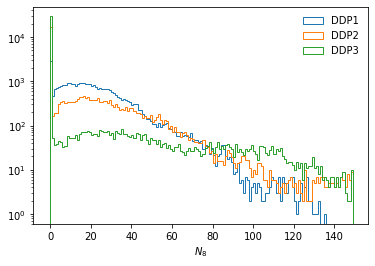

In [8]:
bins=np.arange(-1., 150., 1.)

_ = pl.hist(gama_d8['DDP1_N8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_N8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_N8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$N_8$')
pl.yscale('log')
pl.legend(frameon=False)

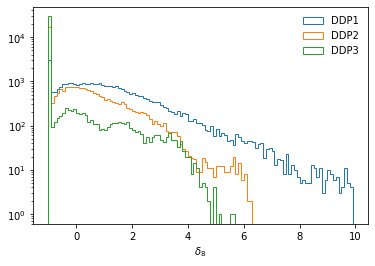

In [9]:
bins=np.arange(-1., 10., 0.1)

_ = pl.hist(gama_d8['DDP1_DELTA8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_DELTA8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_DELTA8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$\delta_8$')
pl.yscale('log')
pl.legend(frameon=False)

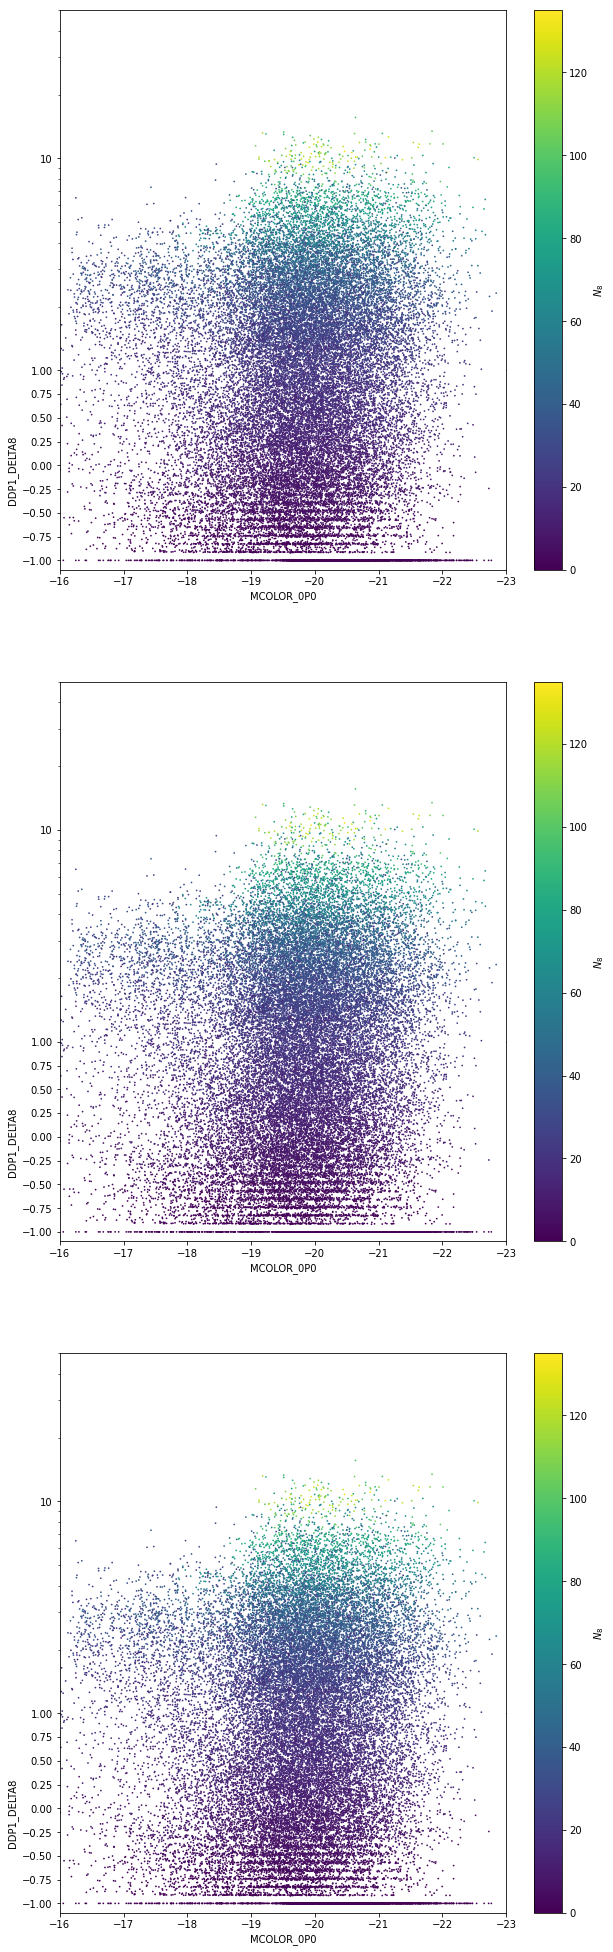

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(10, 35))

for idx, ax in enumerate(axes):
    sc = ax.scatter(gama_d8['MCOLOR_0P0'],\
                    gama_d8['DDP1_DELTA8'],\
                    c=gama_d8['DDP1_N8'],\
                    marker='.',\
                    lw=0.0,\
                    s=12)

    ax.set_xlabel('MCOLOR_0P0')
    ax.set_ylabel('DDP1_DELTA8')

    ax.set_xlim(-23., -16.)
    ax.set_ylim(-1.1, 1.)
    
    ax.spines['top'].set_visible(False)
    
    divider = make_axes_locatable(ax)
    
    axLog = divider.append_axes("top", size=5.0, pad=0, sharex=ax)
    axLog.set_yscale('log')
    axLog.set_xlim((-16., -23.))
    axLog.set_ylim((1., 50.))
    axLog.scatter(gama_d8['MCOLOR_0P0'], gama_d8['DDP1_DELTA8'], c=gama_d8['DDP1_N8'], marker='.', lw=0.0, s=12)

    axLog.spines['bottom'].set_visible(False)
    axLog.xaxis.set_ticks_position('top')
    axLog.xaxis.set_visible(False)

    axLog.set_yticks([10.])
    axLog.set_yticklabels(['10'])
    
    ax.set_title('DDP{}'.format(idx+1))

    colorbar = fig.colorbar(sc, ax=ax, label=r'$N_8$')

In [19]:
realz  = 0
rpaths = [os.environ['HOME'] + '/data/GAMA4/randoms/randoms_bd_ddp_n8_G{}_{:d}.fits'.format(ff, realz) for ff in [9, 12, 15]]

print('Reading: {}'.format(rpaths))

rand   = None

for rpath in rpaths:
    if not os.path.isfile(rpath):
        raise  RuntimeError('Expect random bound dist. file for {}; Run bound_dist.py for this field'.format(rpath))

    if rand == None:
        rand = Table.read(rpath)

    else:
        rand = vstack([rand, Table.read(rpath)])

Reading: ['/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_bd_ddp_n8_G9_0.fits', '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_bd_ddp_n8_G12_0.fits', '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_bd_ddp_n8_G15_0.fits']


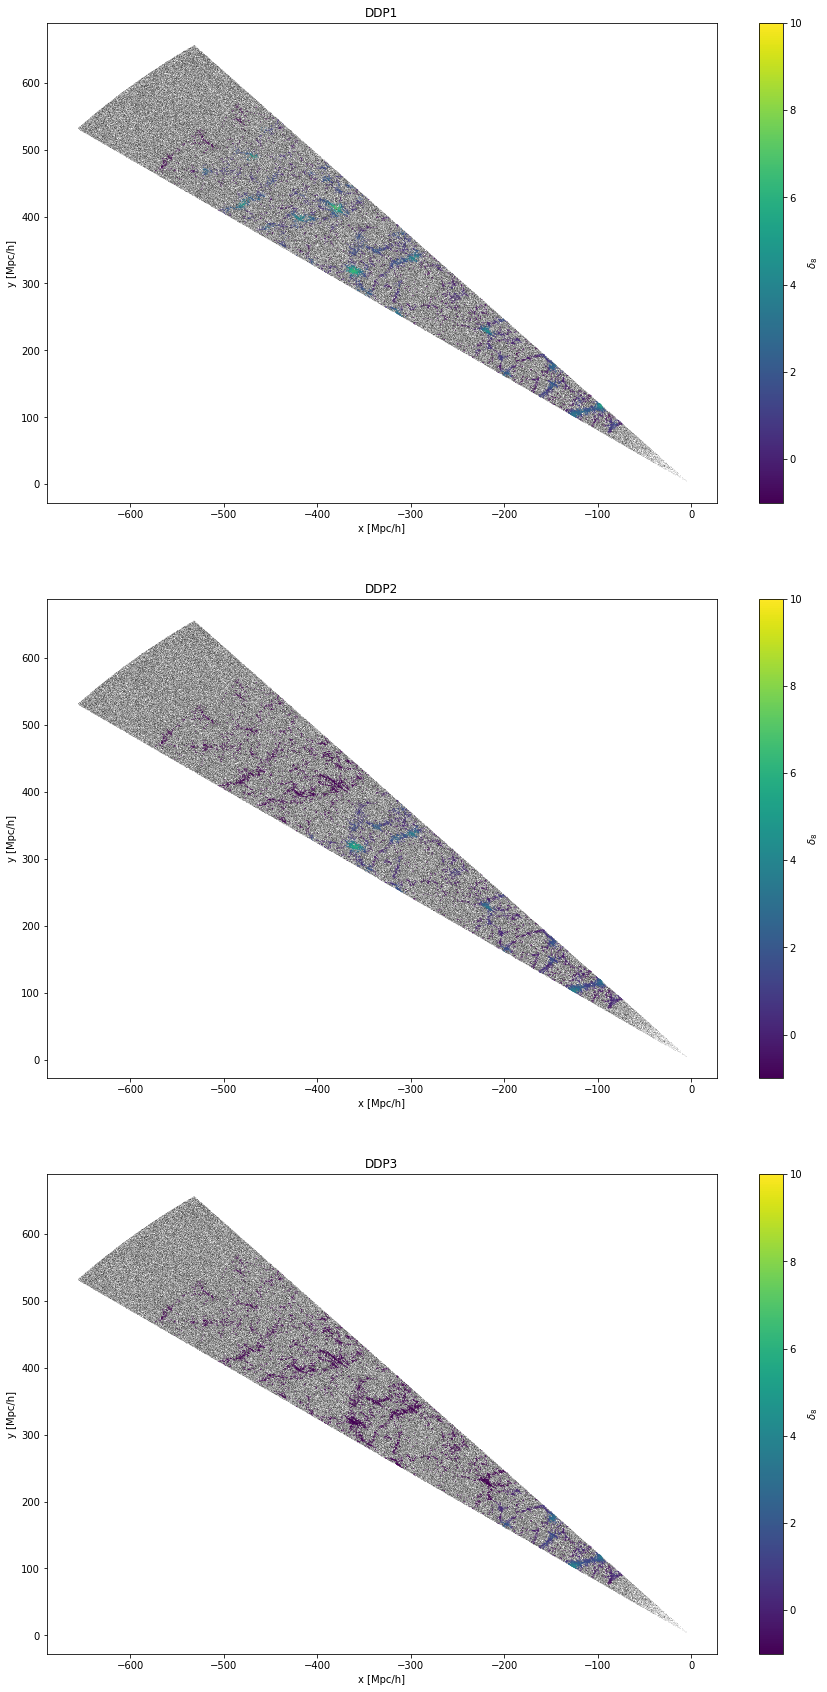

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(15, 30))

rand_d8   = rand[rand['FIELD'] == field]

gama_d8_slice = gama_d8[np.abs(gama_d8['CARTESIAN_Z']) < 5.]
rand_d8_slice = rand_d8[np.abs(rand_d8['CARTESIAN_Z']) < 5.]

for idx in range(3):
    # rand_d8_slice['DDP{}_DELTA8'.format(idx+1)]
    
    sc = axes[idx].scatter(rand_d8_slice['CARTESIAN_X'],\
                           rand_d8_slice['CARTESIAN_Y'],\
                           c='k',\
                           alpha=0.05,\
                           marker='.',\
                           lw=0.0,\
                           s=3,\
                           vmin=-1.,\
                           vmax=10.)
    
    sc = axes[idx].scatter(gama_d8_slice['CARTESIAN_X'],\
                           gama_d8_slice['CARTESIAN_Y'],\
                           c=gama_d8_slice['DDP{}_DELTA8'.format(idx+1)],\
                           alpha=1.,\
                           marker='.',\
                           lw=0.0,\
                           s=3,\
                           vmin=-1.,\
                           vmax=10.)
    
    
    axes[idx].set_ylim(100., -100.)
    
    colorbar = fig.colorbar(sc, ax=axes[idx], label=r'$\delta_8$')    
    
    axes[idx].set_xlabel('x [Mpc/h]')
    axes[idx].set_ylabel('y [Mpc/h]')
    
    axes[idx].set_title('DDP{}'.format(idx+1))

In [23]:
rand['Z'].min(), rand['Z'].max()

(0.002587183, 0.29999992)

In [24]:
gama_d8.meta

OrderedDict([('EXTNAME', 'TilingCat'),
             ('TCOMM1', 'GAMA ID'),
             ('TUCD1', 'meta.id;meta.main'),
             ('TCOMM2', 'SDSS objid'),
             ('TUCD2', 'meta.id'),
             ('TCOMM3', 'J2000 coordinate'),
             ('TUCD3', 'pos.eq.ra'),
             ('TCOMM4', 'J2000 coordinate'),
             ('TUCD4', 'pos.eq.dec'),
             ('TCOMM5', '3-arcsec fiber magnitude'),
             ('TUCD5', 'phot.mag;em.opt.R'),
             ('TCOMM6', 'Extinction-corrected SDSS DR7 Petrosian mag'),
             ('TUCD6', 'phot.mag;em.opt.R'),
             ('TCOMM7', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD7', 'phot.mag;em.opt.U'),
             ('TCOMM8', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD8', 'phot.mag;em.opt.B'),
             ('TCOMM9', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD9', 'phot.mag;em.opt.R'),
             ('TCOMM10', 'Extinction-corrected SDSS DR7 mag'),
             ('TUCD10', 'phot.mag;em.opt.I

In [27]:
np.unique(rand['FIELD'], return_counts=True)

(<Column name='FIELD' dtype='bytes3' length=3>
 G12
 G15
  G9,
 array([1840387, 1840387, 1840387]))

In [13]:
tiers = delta8_tier(gama_d8['DDP1_DELTA8'])

In [14]:
np.unique(tiers, return_counts=True)

(array([-99,   0,   1,   2,   3]), array([13480,  3118,  1302,  3617, 12843]))

In [46]:
realz  = 0
rpaths = [os.environ['HOME'] + '/data/GAMA4/randoms/randoms_G{}_{:d}.fits'.format(ff, realz) for ff in [9, 12, 15]]

print('Reading: {}'.format(rpaths))

rand   = None

for rpath in rpaths:
    if not os.path.isfile(rpath):
        raise  RuntimeError('Expect random bound dist. file for {}; Run bound_dist.py for this field'.format(rpath))

    if rand == None:
        rand = Table.read(rpath)

    else:
        rand = vstack([rand, Table.read(rpath)])

Reading: ['/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_G9_0.fits', '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_G12_0.fits', '/cosma/home/durham/dc-wils7/data/GAMA4/randoms/randoms_G15_0.fits']


/cosma/home/durham/dc-wils7/.local/lib/python3.9/site-packages/astropy/table/table.py:3488: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


G9
7.7349277 845.3436
-88.20355 845.3436
-36.792423 845.3436

G12
7.734923 845.3436
-88.187325 845.3436
-36.85414 845.3436

G15
7.7349277 845.3436
-88.20355 845.3436
-36.792423 845.3436



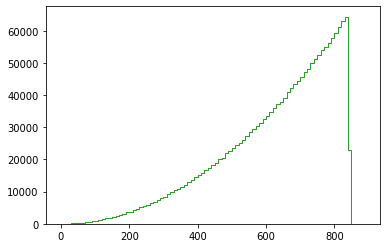

In [47]:
for field in ['G9', 'G12', 'G15']:
    in_field = rand[rand['FIELD'] == field]
    
    # pl.plot(rand['RANDOM_RA'], rand['RANDOM_DEC'], marker=',', lw=0.0)
    
    pl.hist(in_field['CARTESIAN_X'], histtype='step', bins=np.arange(0., 900., 10.))
        
    print(field)
    print(np.sort(in_field['CARTESIAN_X'].data).min(), np.sort(in_field['CARTESIAN_X']).max())
    print(np.sort(in_field['CARTESIAN_Y'].data).min(), np.sort(in_field['CARTESIAN_X']).max())
    print(np.sort(in_field['CARTESIAN_Z'].data).min(), np.sort(in_field['CARTESIAN_X']).max())
    print()

In [48]:
rand.dtype.names

('RANDOM_RA',
 'RANDOM_DEC',
 'Z',
 'V',
 'RANDID',
 'FIELD',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'IS_BOUNDARY')

# Done.